# PROJETO 1 - CIENCIA DOS DADOS

** Nome: Mariana Sophia Abrantes **

## Pergunta: Como o saneamento básico urbano e a energia produzida influencia no IDH? 

___

# *** IDH, saneamento básico e energia ***

Foram coletados três dados do site https://www.gapminder.org/:
1. Sanemanto Básico Urbano
2. Energia Produzida Total
3. IDH

No dataframe **dados** criado a seguir, o conteúdo de cada célula é a proporção da população que tem acesso a boas condições de saneamento básico urbano em um determinado ano (coluna) para determinado país (linha).

No dataframe **dados2** criado a seguir, o conteúdo de cada célula é a medida da Energia Produzida total de um determinado ano (coluna) para um determinado país (linha).

No dataframe **dados3** criado a seguir, o conteúdo de cada célula é o IDH de um determinado ano (coluna) para um determinado país (linha).

A análise dos dados tem como objetivo descobrir se um bom desenvolvimento de energia e o seneamento basico influenciam no IDH e se estes dois dados influenciam entre si.

Vamos nos restringir a analisar o ano de **2009**.


# Imports 

In [174]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [175]:
import os
print(os.getcwd())

C:\Users\Mariana Abrantes\Documents\ciencia_dados\Projeto1\p1


In [196]:
writer = pd.ExcelWriter('Projeto1_mariana.abrantes.xlsx')
data.to_excel(writer, 'data')
writer.save()

# Leitura dos dados e fixação do ano 

### Saneamento Básico

In [176]:
dados = pd.read_excel('sanitation.xlsx')

In [177]:
dados = dados[['Proportion of the population using improved sanitation facilities, urban', 2009]]
dados = dados.rename(index = str, columns = {'Proportion of the population using improved sanitation facilities, urban': "Country Name", 2009 : 'Proportion of the population using improved sanitation facilities, urban'})
dados.head()

,Country Name,"Proportion of the population using improved sanitation facilities, urban"
0,Abkhazia,NaN
1,Afghanistan,60.0
2,Akrotiri and Dhekelia,NaN
3,Albania,95.0
4,Algeria,98.0


### Energia 

In [178]:
dados2 = pd.read_excel("energy produce total.xlsx")

In [179]:
dados2 = dados2[['Energy production, total (toe)', '2009']]
dados2 = dados2.rename(index = str, columns = {'Energy production, total (toe)': "Country Name", '2009': 'Energy production'})
dados2.head()

,Country Name,Energy production
0,Afghanistan,NaN
1,Albania,1253.804
2,Algeria,152291.931
3,American Samoa,NaN
4,Andorra,NaN


### HDI

In [180]:
dados3 = pd.read_excel("Indicator_HDI.xlsx")
dados3 = dados3[['HDI', 2009]]
dados3 = dados3.rename(index = str, columns = {'HDI': "Country Name", 2009: 'HDI'})
dados3.head()

,Country Name,HDI
0,Abkhazia,NaN
1,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN
3,Albania,0.734
4,Algeria,0.691


# Junção das tabelas

In [181]:
df = dados.join(dados2, how='inner', lsuffix='.', rsuffix='.')
df.head()

,Country Name.,"Proportion of the population using improved sanitation facilities, urban",Country Name.,Energy production
0,Abkhazia,NaN,Afghanistan,NaN
1,Afghanistan,60.0,Albania,1253.804
2,Akrotiri and Dhekelia,NaN,Algeria,152291.931
3,Albania,95.0,American Samoa,NaN
4,Algeria,98.0,Andorra,NaN


In [182]:
data = df.join(dados3, how="inner")
data.head()

,Country Name.,"Proportion of the population using improved sanitation facilities, urban",Country Name.,Energy production,Country Name,HDI
0,Abkhazia,NaN,Afghanistan,NaN,Abkhazia,NaN
1,Afghanistan,60.0,Albania,1253.804,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN,Algeria,152291.931,Akrotiri and Dhekelia,NaN
3,Albania,95.0,American Samoa,NaN,Albania,0.734
4,Algeria,98.0,Andorra,NaN,Algeria,0.691


# Plotando gráficos

### Gráfico em box da Energia

Depois de fazer o levantamento dos dados de energia e a junção com os outros dados, vamos plotar um grafico em box e sua descrição, afim de analisar melhor os dados e descobrir como está distribuida a energia produzida neste ano de 2009.

count    1.350000e+02
mean     9.014826e+04
std      2.604072e+05
min      0.000000e+00
25%      3.403649e+03
50%      1.521460e+04
75%      6.736102e+04
max      2.084940e+06
Name: Energy production, dtype: float64

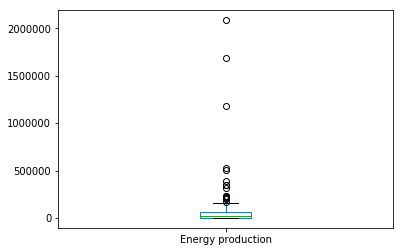

In [183]:
data.loc[:, "Energy production"].plot.box()
data['Energy production'].describe()

Podemos analisar que a distribuição da energia produzida fica abaixo de 500000, portanto podemos analisar esses dados mais perto, reduzindo os dados para 10000.

count      58.000000
mean     3305.568224
std      2978.562981
min         0.000000
25%       853.231500
50%      2144.050000
75%      5036.430500
max      9826.067000
Name: Energy production, dtype: float64

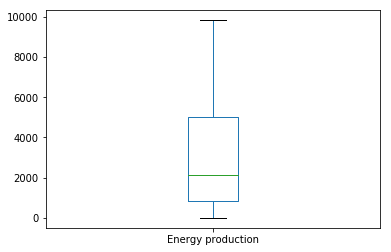

In [198]:
data=data.dropna(subset=['Energy production'])
data=data[data['Energy production']<10000]
data.loc[:, "Energy production"].plot.box()
data['Energy production'].describe()

Depois de fazer a analise de distruibuição da energia produzida, vamos cruzar este dado com os dados de sanemanto básico urbano, afim de descobrir se eles possuem alguma relação.

Proportion of the population using improved sanitation facilities, urban: 0.16258399904274784


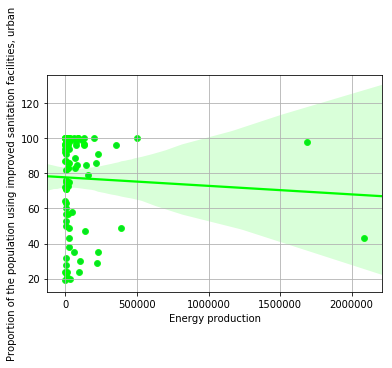

In [199]:
df.plot.scatter(y='Proportion of the population using improved sanitation facilities, urban', x ='Energy production')
sns.regplot(df["Energy production"],df["Proportion of the population using improved sanitation facilities, urban"], color=('lime'))
print('Proportion of the population using improved sanitation facilities, urban:', data['Energy production'].corr(data['Proportion of the population using improved sanitation facilities, urban']))
plt.grid()

O gráfico nos mostra que os dados não possuem relação, sendo o valor da correlação 0.16258399904274784. Eles não apresentam nenhuma correlação pelo fato de serem dados independentes, ou seja, o saneamento básico urbano não depende da energia produzida para a população ter acesso. O mesmo ocorre para a energia. 

### Gráfico em box do IDH

Vamos realizar o mesmo procedimento que foi feito acima. Plotaremos um gráfico em box e a descrição dos dados de IDH do ano de 2009.

count    40.000000
mean      0.663675
std       0.185611
min       0.277000
25%       0.555500
50%       0.713000
75%       0.805500
max       0.941000
Name: HDI, dtype: float64

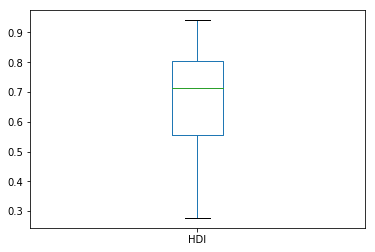

In [200]:
data.loc[:, "HDI"].plot.box()
data['HDI'].describe()

Podemos avaliar que 50% dos paises estão concentrados entre 0.5 a 0.8 e não apresenta nenhum outlier. Em seguida iremos cruzar este dado com os dados de energia produzida para ver se possuem alguma relação.

Energy production: 0.17977500616671918


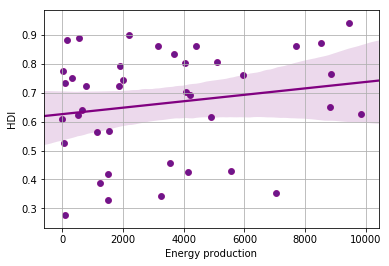

In [201]:
data.plot.scatter(y ='HDI', x= 'Energy production' )
sns.regplot(data["Energy production"],data["HDI"], color=('purple'))
data=data.dropna(subset=['Energy production'])
data=data[data['Energy production']<10000]
print('Energy production:', data['HDI'].corr(data['Energy production']))
plt.grid()

A partir de sua analise, vemos que os dados também não possuem nenhuma relação, já que a correlação é de 0.17977500616671918. Isso se dá ao fato de que o Índice de Desenvolvimento Humano ser calculado com variáveis que não possuem influência com a energia produzida pelos países. (O IDH é calculado pela educação, expectativa de vida e PIB). 

### Gráfico em box da população que tem acesso a boas condições de saneamento básico urbano.

Como fizemos acima, também plotaremos um gráfico em box e uma descrição sobre os dados de sanemaento básico urbano, afim de descobrir se este dado possui alguma relação com o IDH.

count     42.000000
mean      79.047619
std       25.025794
min       19.000000
25%       65.750000
50%       91.500000
75%       99.000000
max      100.000000
Name: Proportion of the population using improved sanitation facilities, urban, dtype: float64

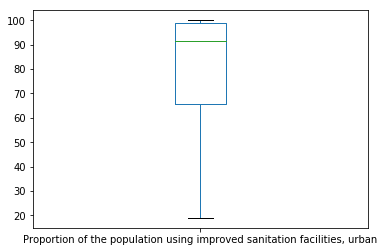

In [188]:
data.loc[:, "Proportion of the population using improved sanitation facilities, urban"].plot.box()
data['Proportion of the population using improved sanitation facilities, urban'].describe()

Podemos observar que a concentração da população urbana que tem acesso ao saneamento básico se encontra entre 60 a 100 milhões de habitantes. A seguir cruzaremos este dado com o IDH para enfim descobrir se possuem alguma relação.

Proportion of the population using improved sanitation facilities, urban: 0.8666366014422302


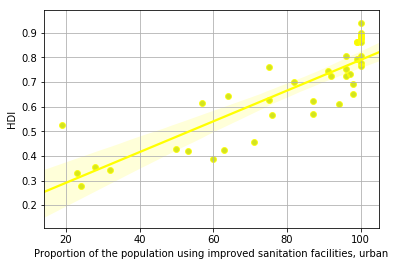

In [189]:
data.plot.scatter(y ='HDI', x= 'Proportion of the population using improved sanitation facilities, urban' )
sns.regplot(data['Proportion of the population using improved sanitation facilities, urban'],data["HDI"], color=('yellow'))
print('Proportion of the population using improved sanitation facilities, urban:', data['HDI'].corr(data['Proportion of the population using improved sanitation facilities, urban']))
plt.grid()

Podemos analisar que os dados possuem relação, já que sua correlação é  0.8666366014422302 (próxima a 1). Isso se dá ao fato de que o acesso da população ao sanemanento básico interferir na expectativa de vida, pois com sanemaneto básico os problemas à saúde diminuiem, gerando um aumento da expectativa de vida.

## Analisando os paises com baixo IDH

Vamos agora analisar os paises com os piores índices de IDH, baixo saneamento e energia produzida, para no fim analisar os comportamento dos dados.

In [205]:
idh = dados3[dados3['HDI'] <= 0.4]
idh

,Country Name,HDI
1,Afghanistan,0.387
33,Burkina Faso,0.326
34,Burundi,0.308
40,Central African Republic,0.334
41,Chad,0.323
49,"Congo, Dem. Rep.",0.277
53,Cote d'Ivoire,0.397
71,Ethiopia,0.353
92,Guinea,0.341
93,Guinea-Bissau,0.348


In [206]:
ener = dados2[dados2['Energy production'] <= 10000].head(10)
ener

,Country Name,Energy production
1,Albania,1253.804
8,Armenia,824.933
17,Belarus,4045.351
20,Benin,1995.556
24,Bosnia and Herzegovina,4473.804
25,Botswana,938.127
28,Bulgaria,9826.067
31,Cambodia,3667.950
32,Cameroon,8848.610
39,Chile,9298.844


In [220]:
dados2[dados2['Energy production'] >= 50000].tail()
dados2

,Country Name,Energy production
0,Afghanistan,NaN
1,Albania,1253.804
2,Algeria,152291.931
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,100957.649
6,Antigua and Barbuda,NaN
7,Argentina,80818.691
8,Armenia,824.933
9,Aruba,NaN


In [207]:
sb= dados[dados['Proportion of the population using improved sanitation facilities, urban']<= 30]
sb

,Country Name,"Proportion of the population using improved sanitation facilities, urban"
23,Benin,24.0
41,Chad,30.0
49,"Congo, Dem. Rep.",24.0
50,"Congo, Rep.",20.0
71,Ethiopia,28.0
83,Ghana,19.0
95,Haiti,24.0
126,Liberia,29.0
133,Madagascar,21.0
196,Sao Tome and Principe,30.0


## Histograma do IDH, Energia e Sanemanto dos paises subdesenvolvidos

### Saneamento básico urbano

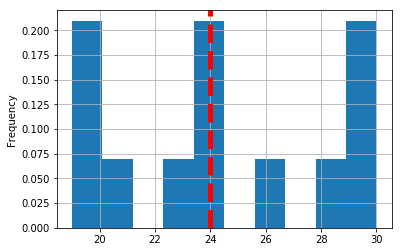

In [208]:
sb["Proportion of the population using improved sanitation facilities, urban"].plot.hist(density=True)
plt.axvline(sb['Proportion of the population using improved sanitation facilities, urban'].median(), color= 'r', linestyle= 'dashed', linewidth= 5)
plt.grid(True)

Observamos que o valor da média e da mediana coincidem, com isso a distribuição é simetrica, conforme observado no histograma. Portanto a população que possui acesso ao sanemaneto básico está em torno de 24.

### Energia 

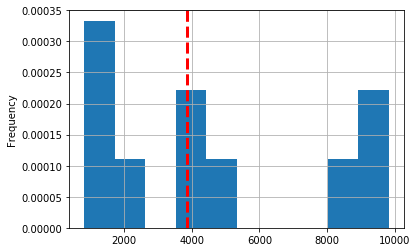

In [209]:
ener["Energy production"].plot.hist(density=True)
plt.axvline(ener['Energy production'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.grid(True)

Observamos que a mediana é próxima a 4000 e a distribuição é assimétrica à esquerda, conforme observado no histograma. Portanto a quantidade de países que possuem um alto valor de produção de energia está entre 1000 a 4000.

### IDH

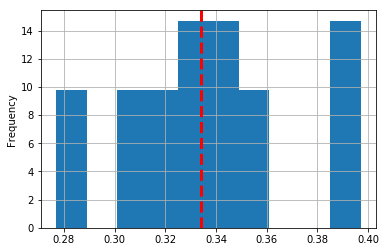

In [210]:
idh["HDI"].plot.hist(density=True)
plt.axvline(idh['HDI'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.grid(True)

Podemos observar que a média e a mediana estão próximas, sendo que há uma maior concentração ao centro do histograma. Portanto a mediana do Índice de Desenvolvimento Humano se aproxima a 0.34. 

# ***Conclusão***

A partir das análises feitas acima, é possivel observar que os dados de sanemamento básico urbano possuem uma correlação com o IDH, pois segundo um estudo feito pelo Trata Brasil/FGV, a população que não possui acesso ao sanemaneto estão suscetíveis a doenças gastrointestinais, contribuindo para uma queda na expectativa de vida. Isso gera um custo elevado ao governo, sendo que se houvesse melhoria na infraestrutura, o custo com a saúde pública seria mais baixo e seria possivel aplicar esta economia a outro setor, o qual poderia aumentar o PIB dos países. Outro dado levantado pelo estudo Trata Brasil/FGV, traz a informação que crianças que vivem em ambientes inóspitos com falta de acesso ao sanemamento básico, possuem rendimento escolar 18% inferior ao das crianças que vivem em uma ambiente com acesso ao sanemaento. Portanto, estes dados se correlacionam.

Já os dados de energia produzida e de Índice de Desenvolvimento Humano, não possuem muita correlação, pois um país desenvolvido não precisa ter uma alta produção de energia para ter um bom IDH. Como é o caso do Chile, que possui um IDH de 0.789 e uma produção de energia de 9298.844, enquanto o Yemen, possui uma alta produção de energia de 15221.547, mas possui um IDH de 0,452. Portanto, a energia produzida não exerce influência sob o IDH.